
## Homework 1


Spencer Pease  
ASTR 427

--------------------------


In [1]:
# Imports

%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Problem 1

In [2]:
# Problem 1a

itr = 1 # iterator

epsilon = 2**(itr) # offset from 1 (in terms of general floting point formula)
result = 1.0 - epsilon # measured difference

while result != 1:
    itr -= 1
    
    epsilon = 2.0**(itr)
    result = 1 - epsilon

    
epsilon # answer: smallest measuralbe offset below 1

5.551115123125783e-17

In [3]:
# Problem 1b

itr = 1 # iterator

epsilon = 2**(itr) # offset (in terms of general floting point formula)
result = 1.0 + epsilon # measured difference

while result != 1:
    itr = itr - 1 
    
    epsilon = 2.0**(itr)
    result = 1 + epsilon

    
epsilon # answer: smallest measurable offset above 1

1.1102230246251565e-16

In [4]:
# Problem 1c
value = 2.0 # current max value

while value * 2.0 < np.inf:
    value *= 2.0

inc_fac = 1.0 # incrementing factor: value to multiple against current max

while value * inc_fac < np.inf:
    inc_fac += .000000000001
    inc_fac *= inc_fac
    
maxnum = value 
maxnum # maximun representible positive number

8.98846567431158e+307

In [5]:
# Problem 1d
value = 2.0 # current min value

while value / 2.0 > 0:
    value /= 2.0

minnum = value
minnum # minimum representable positive number

5e-324

The smallest change above 1 is greater than the smallest change below one because the difference between representable numbers is smaller for lower values.

It is easier to represent the minimun value than the maximun value becuase the minimum positive representable positive number has a non-fractional binary representation, allowing us to find the exact value. The maximim representable value, however, has a repeating factional representation in binary, so it is difficult to exactly find through emperical methods.

## Problem 2

 Numerically:
 
 $\lim _{x \to 0} \frac{1 - \cos{x}}{x^{2}} = \frac{1}{2}$

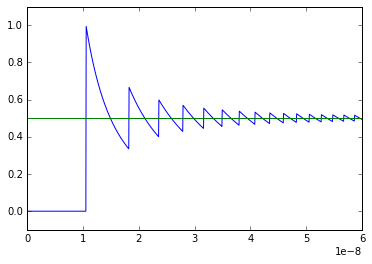

In [6]:
x = np.linspace(0, 6e-8, 1000) # domain to plot fucntion over
func = ((1 - np.cos(x)) / (x**2)) # function to plot
numerical = 1000*[.5] # line with the value of the numerical limit

plt.xlim(0, 6e-8)
plt.ylim(-0.1, 1.1)
plt.plot(x, func)
plt.plot(x, numerical)
plt.show()

In the analytical solution, when x decreases past 1e-7, it becomes apparrent that the computer is unable to accurately represent continuous values, as seen in the sawtooth behavior of the function. Also, the function drops to 0 for x values lower than 1e-8 because the function involve x^2, and the computer can't distinguish between number changes less than ~1e-18, so it approximates the function to 0. 

## Problem 3

In [7]:
# Problem 3a

# Reads in a data file with the given file path
# Returns an array of defined coordinates
def read_dat(filename):
    data = np.loadtxt(filename)
    return data

# finds the points defined in the given array of data that most closely bound the given interpolation point
# Returns an array of two points
def lin_interp_bounds(data, point):
    index_x1 = 0
    while data[index_x1 + 1][0] < point:
        index_x1 += 1
    
    p1 = [data[index_x1][0], data[index_x1][1]]
    p2 = [data[index_x1+1][0], data[index_x1+1][1]]
    
    return p1, p2

# Finds the linear interpolation of a given point based on a given array of defined points
# Returns the linear interpolation value
def lin_interp_point(data, point):
    
    [p1, p2] = lin_interp_bounds(data, point)
    x1 = p1[0]
    y1 = p1[1]
    x2 = p2[0]
    y2 = p2[1]
    
    interpolation = y1 + (point - x1) * (y2 - y1)/(x2 - x1)
    
    return interpolation


In [8]:
# Problem 3b

file = open('hw1.dat') # location of file containing needed data
data = read_dat(file) # array of values defined in the given file

point = 4.75 # point to interpolate

interpolation = lin_interp_point(data, point)
interpolation # answer: linear interpolation

4.5625

In [9]:
# Problem 3c

# given an array of defined points and a point to interpolate, construct the highest order polynomial possible
# that fits the given data.
# Return the interpolation of the given point using the constructed polynomial
def neville(data, point):
    
    n = len(data)
    p = n*[0]
    
    for k in range(n):
        
        for j in range(n-k):
            
            if k == 0:
                p[j] = data[j][1]
                
            else:
                p[j] = ((data[j+k][0] - point)*p[j] + (point - data[j][0])*p[j+1]) / (data[j][0] - data[j+k][0])
          
    return p[0]

estimate = neville(data, point)
estimate # answer: approximation given by Neville's algorithm

2.9516602099609388

In [10]:
# Problem 3d (setup)

# Defines the actual function for the dataset
# returns the the evaluation of the function at a given point
# NOTE: MUST BE DEFINED BY THE USER
def func_actual(x):
    
    result = 100 / x**2
    return result

# Defines a linear function determined by the two given point arrays
# Returns the evaluation of the function at the given `x`
def func_lin(p1, p2, x):
    
    x1 = p1[0]
    x2 = p2[0]
    y1 = p1[1]
    y2 = p2[1]
    
    slope = (y2 - y1) / (x2 - x1)
    
    result = slope*(x - x1) + y1
    return result

In the case of the given data, at **```x = 4.75```**, linear interpolation produces a value closer to the value given by the actual function than interpolation with Neville's algorithm.

The polynomial given with Neville interpolation does not have enough data to closely match the actual function for values outside of the given data, as you can see when the polynomial increases rapidly around **```x = 5```**. Even though linear intepolation is generally less accurate, in this case the actual function lends itsel well to being approximated over small intervals with linear equations becuase the derivative is linear.

The plot below shows the actual function, Neville interpolation, and linear interpolation about the point of interest, allowing you to compare wich interpolation is more accurate.


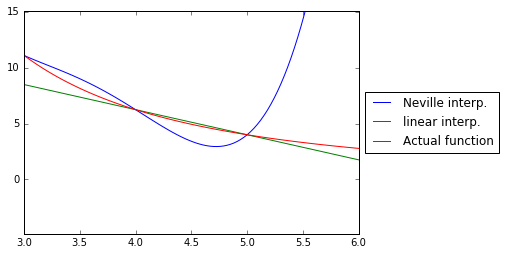

In [11]:
# Problem 3d (plotting)

[p1, p2] = lin_interp_bounds(data, point) # point arrays of the defined data points that bound the interpolation point
y_center = (p1[1] + p2[1]) / 2 # average y-value of the bounding points

x = np.linspace(p1[0]-1, p2[0]+1, 100) # domian to plot function over

plt.xlim(p1[0]-1, p2[0]+1)
plt.ylim(y_center - 10, y_center + 10)
plt.plot(x, neville(data, x), label='Neville interp.')
plt.plot(x, func_lin(p1, p2, x), label='linear interp.')
plt.plot(x, func_actual(x), label='Actual function')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()